In [90]:
import matplotlib.pyplot as plt
import sympy as sp

In [93]:
t,s =sp.Symbol('t', positive=True, real=True), sp.Symbol("s")
A = sp.Symbol("A", real=True)
k = sp.Symbol("k", real=True)

# Ejercicio 1

Suponga que la transformada de Laplace de la solución de una EDO está dada por

$ \mathcal{L}\left\lbrace x (t) \right\rbrace (s) = \dfrac{(s-1)(s+1)(s-2)(s+2)(s-3)(s+3)}{s^2(s+1)^2(s^2-1)^2} $

encuentre la solución $x(t)$.

In [57]:
f = ((s - 1) * (s + 1) * (s - 2) * (s + 2) * (s - 3) * (s + 3)) / (s**2 * (s + 1)**2 * (s**2 - 1)**2)
g = sp.inverse_laplace_transform(f,s,t, noconds=True)
sp.inverse_laplace_transform(f,s,t, noconds=True)

(-6*t**2 - 41*t + 3*(-12*t + exp(t) + 24)*exp(t) - 75)*exp(-t)

In [58]:
sp.laplace_transform(g, t, s, noconds=True)

(s**4 - 13*s**2 + 36)/(s**2*(s**4 + 2*s**3 - 2*s - 1))

# Ejercicio 2

La función definida formalmente como

$ \delta(t-a) = \left\lbrace
\begin{matrix}
0 & \textrm{si} & t\neq a \\
& &\\
\infty &  \textrm{si} & t = a 
\end{matrix}
\right.$

se denomina delta de Dirac o impulso unitario.

Para utilizar dicha función utilizamos el comando sp.DiracDelta.

Calcular la transformada de Laplace de $\delta(t)$ y $\delta(t-A)$, para $A \in \mathbb{R}$

In [65]:
g = sp.DiracDelta(t - A)
sp.laplace_transform(f, t, s, noconds=True)

A*(1 - Heaviside(A*exp_polar(I*pi)))*exp(-A*s)

In [55]:
f = sp.DiracDelta(t)
sp.laplace_transform(f, t, s, noconds=True)

0

# Ejercicio 3

calcule
$ \mathcal{L} \left\lbrace f(t)  \delta(t-A) \right\rbrace (s)  $

para 
* $f(t)=t$
* $f(t)=t^2$
* $f(t)=t^3$
* $ f(t) = \sin (kt) ; k\in \mathbb{R}$
* $ f(t) = \cos (kt) ; k\in \mathbb{R}$

A partir de sus resultados, establezca una una fórmula general para
$ \mathcal{L} \left\lbrace f(t)  \delta(t-A) \right\rbrace (s)$
con $f$ arbitrario.

In [66]:
f = t * g
sp.laplace_transform(f, t, s, noconds=True)

A*(1 - Heaviside(A*exp_polar(I*pi)))*exp(-A*s)

In [67]:
f = t**2 * g
sp.laplace_transform(f, t, s, noconds=True)

A**2*(1 - Heaviside(A*exp_polar(I*pi)))*exp(-A*s)

In [68]:
f = t**3 * g
sp.laplace_transform(f, t, s, noconds=True)

A**3*(1 - Heaviside(A*exp_polar(I*pi)))*exp(-A*s)

In [73]:
f = sp.sin(k*t) * g
sp.laplace_transform(f, t, s, noconds=True)

(1 - Heaviside(A*exp_polar(I*pi)))*exp(-A*s)*sin(A*k)

In [74]:
f = sp.cos(k*t) * g
sp.laplace_transform(f, t, s, noconds=True)

(1 - Heaviside(A*exp_polar(I*pi)))*exp(-A*s)*cos(A*k)

## Ejercicio 4

Suponga que tras aplicar transformada de Laplace a un PVI resulta lo siguiente:

$  \mathcal{L} \left\lbrace y(t) \right\rbrace (s) =   4 - 2 e^{-3s} \sin(3) $

Calcule (sin usar python) $y(t)$. 

## Ejercicio 5

Verifique que su conjetura del ejercicio anterior es correcta calculando 
$\mathcal{L}^{-1}\left\lbrace  4 - 2 e^{-3s} \sin(3) \right\rbrace (t)$
usando Python.

In [84]:
f = 4 - 2 * sp.exp(-3 * s) * sp.sin(3)
sp.inverse_laplace_transform(f,s,t,noconds=True)
sp.laplace_transform(-2 * sp.sin(3) * sp.DiracDelta(t - 3), t, s, noconds=True)

-2*exp(-3*s)*sin(3)

## Ejercicio 6

Resolver el PVI
$$ y''' = f(t),  $$
con condiciones iniciales $y''(0)=y'(0)=1, y(0)=0$, donde $f$ está definida por

$$
f(t) = \left\lbrace
\begin{matrix}
2 & si & t<3 \\
t & si & 3 \leq t \leq 4 \\
te^{A(t-4)} & si & t>4
\end{matrix}
\right.
$$

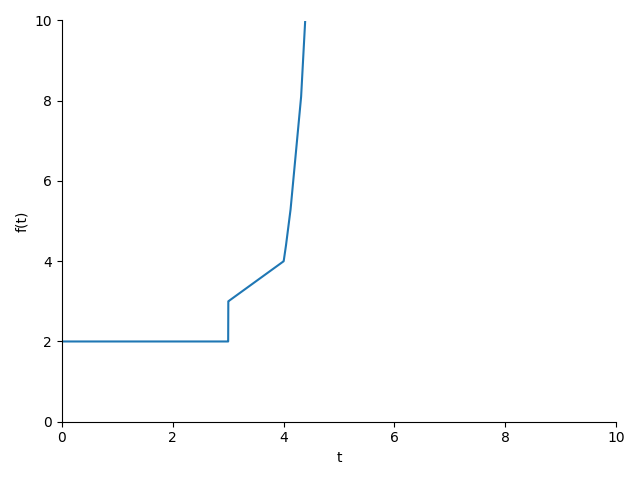

In [103]:
f = 2 - 2 * sp.Heaviside(t - 3) + t * sp.Heaviside(t - 3) - t * sp.Heaviside(t - 4) + t * sp.exp(2 * (t - 4)) * sp.Heaviside(t - 4) # se camabia el A por valor
sp.plot(f, xlim=(0,10), ylim=(0,10))

In [105]:
transformada = sp.laplace_transform(f, t, s, noconds=True)
transformada

4*s*exp(-4*s)/(s - 2)**2 - 7*exp(-4*s)/(s - 2)**2 + 2/s + exp(-3*s)/s - 4*exp(-4*s)/s + exp(-3*s)/s**2 - exp(-4*s)/s**2

## Ejercicio 7

Para calcular derivadas, podemos utilizar el comando sp.diff( funcion , variable respecto a la que se deriva )

Por ejemplo, si $f(t)= At^3$, entonces su derivada se puede calcular vía

In [5]:
A=sp.Symbol('A')
sp.diff(A*t**2, t)

2*A*t

Más aun, se puede agregar una tercera entrada para indicar el orden de derivación, por ejemplo, si se desea calcular la segunda y tercera derivada de la misma función, utilizamos

In [6]:
sp.diff(A*t**2, t, 2)

2*A

In [7]:
sp.diff(A*t**2, t, 3)

0

Utilizando el teorema que establece (bajo ciertas condiciones) que 

$$ \mathcal{L} \left\lbrace t^n f(t) \right\rbrace (s) = (-1)^{n} \frac{d^n}{dt^n} \mathcal{L} \left\lbrace f(t) \right\rbrace (s)  $$

Calcule la transformada de Laplace de:

* $g(t)= t^{21} \sin(4t)$
* $g(t)=t^{7} e^{-2t}\cos t$
* $g(t)=t^{4} e^{-4t}\cos t \sin (2t)$
